Click [here]() to access the associated Medium article.

# Setup

In [1]:
!pip install -q pandas matplotlib

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Understanding Pivot Tables

In [8]:
# Sample DataFrame
data = {
    "Date": [
        "2023-01-01",
        "2023-01-01",
        "2023-01-02",
        "2023-01-02",
        "2023-01-03",
        "2023-01-03",
    ],
    "Region": ["North", "South", "North", "South", "North", "South"],
    "Product": ["A", "A", "B", "B", "A", "A"],
    "Sales": [100, 150, 200, 250, 300, 350],
}

df = pd.DataFrame(data)
print(df)

         Date Region Product  Sales
0  2023-01-01  North       A    100
1  2023-01-01  South       A    150
2  2023-01-02  North       B    200
3  2023-01-02  South       B    250
4  2023-01-03  North       A    300
5  2023-01-03  South       A    350


## Creating Your First Pivot Table

In [3]:
pivot_table = pd.pivot_table(
    df, values="Sales", index="Region", columns="Product", aggfunc="sum"
)
print(pivot_table)

Product    A    B
Region           
North    400  200
South    500  250


## Customizing Aggregation Functions

In [4]:
pivot_table_avg = pd.pivot_table(
    df, values="Sales", index="Region", columns="Product", aggfunc="mean"
)
print(pivot_table_avg)

Product    A    B
Region           
North    200  200
South    250  250


## Tips for Working with Pivot Tables

In [6]:
pivot_table_multi = pd.pivot_table(
    df, values="Sales", index=["Region", "Product"], aggfunc=["sum", "mean"]
)
print(pivot_table_multi)

                 sum  mean
               Sales Sales
Region Product            
North  A         400   200
       B         200   200
South  A         500   250
       B         250   250


# Advanced Pivot Table Techniques

In [9]:
# Expanded sample DataFrame
data = {
    "Date": [
        "2023-01-01",
        "2023-01-01",
        "2023-01-02",
        "2023-01-02",
        "2023-01-03",
        "2023-01-03",
    ],
    "Region": ["North", "South", "North", "South", "North", "South"],
    "Product": ["A", "A", "B", "B", "A", "A"],
    "Category": [
        "Electronics",
        "Electronics",
        "Furniture",
        "Furniture",
        "Electronics",
        "Electronics",
    ],
    "Sales": [100, 150, 200, 250, 300, 350],
}

df = pd.DataFrame(data)
print(df)

         Date Region Product     Category  Sales
0  2023-01-01  North       A  Electronics    100
1  2023-01-01  South       A  Electronics    150
2  2023-01-02  North       B    Furniture    200
3  2023-01-02  South       B    Furniture    250
4  2023-01-03  North       A  Electronics    300
5  2023-01-03  South       A  Electronics    350


## Multi-Level Indexing

In [11]:
pivot_table_multi = pd.pivot_table(
    df,
    values="Sales",
    index=["Region", "Category"],
    columns="Product",
    aggfunc="sum",
)
print(pivot_table_multi)

Product                 A      B
Region Category                 
North  Electronics  400.0    NaN
       Furniture      NaN  200.0
South  Electronics  500.0    NaN
       Furniture      NaN  250.0


## Handling Missing Data

In [12]:
pivot_table_filled = pd.pivot_table(
    df,
    values="Sales",
    index=["Region", "Category"],
    columns="Product",
    aggfunc="sum",
    fill_value=0,
)
print(pivot_table_filled)

Product               A    B
Region Category             
North  Electronics  400    0
       Furniture      0  200
South  Electronics  500    0
       Furniture      0  250


## Applying Multiple Aggregation Functions

In [13]:
pivot_table_multi_agg = pd.pivot_table(
    df,
    values="Sales",
    index=["Region", "Category"],
    columns="Product",
    aggfunc=["sum", "mean"],
    fill_value=0,
)
print(pivot_table_multi_agg)

                    sum      mean     
Product               A    B    A    B
Region Category                       
North  Electronics  400    0  200    0
       Furniture      0  200    0  200
South  Electronics  500    0  250    0
       Furniture      0  250    0  250


## Customizing the Display

In [14]:
pivot_table_margins = pd.pivot_table(
    df,
    values="Sales",
    index=["Region", "Category"],
    columns="Product",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Total",
)
print(pivot_table_margins)

Product               A    B  Total
Region Category                    
North  Electronics  400    0    400
       Furniture      0  200    200
South  Electronics  500    0    500
       Furniture      0  250    250
Total               900  450   1350


## Tips for Effective Use of Pivot Tables

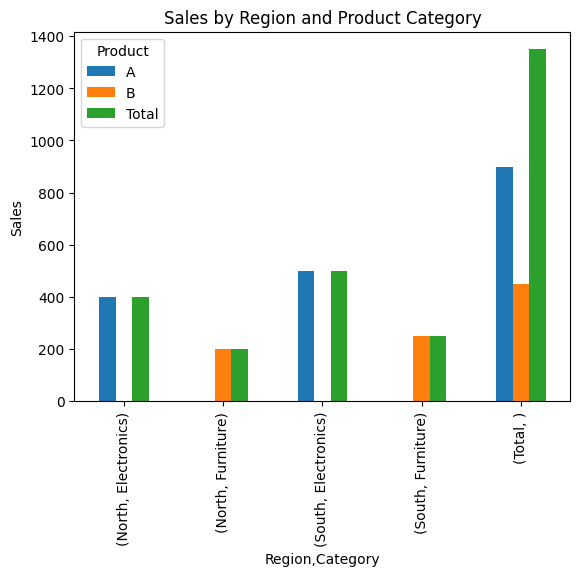

In [15]:
# Example of visualizing the pivot table
pivot_table_margins.plot(kind="bar")
plt.title("Sales by Region and Product Category")
plt.ylabel("Sales")
plt.show()

# Real-World Examples and Case Studies

## Example 1: Sales Analysis by Region and Product

In [19]:
data = {
    "Date": [
        "2023-01-01",
        "2023-01-01",
        "2023-01-02",
        "2023-01-02",
        "2023-01-03",
        "2023-01-03",
        "2023-01-04",
        "2023-01-04",
    ],
    "Region": [
        "North",
        "South",
        "North",
        "South",
        "North",
        "South",
        "North",
        "South",
    ],
    "Product": ["A", "A", "B", "B", "A", "A", "B", "B"],
    "Category": [
        "Electronics",
        "Electronics",
        "Furniture",
        "Furniture",
        "Electronics",
        "Electronics",
        "Furniture",
        "Furniture",
    ],
    "Sales": [100, 150, 200, 250, 300, 350, 400, 450],
}

df = pd.DataFrame(data)
print(df)

         Date Region Product     Category  Sales
0  2023-01-01  North       A  Electronics    100
1  2023-01-01  South       A  Electronics    150
2  2023-01-02  North       B    Furniture    200
3  2023-01-02  South       B    Furniture    250
4  2023-01-03  North       A  Electronics    300
5  2023-01-03  South       A  Electronics    350
6  2023-01-04  North       B    Furniture    400
7  2023-01-04  South       B    Furniture    450


### Step 1: Summarize Total Sales by Region and Product

In [20]:
pivot_table_sales = pd.pivot_table(
    df, values="Sales", index="Region", columns="Product", aggfunc="sum"
)
print(pivot_table_sales)

Product    A    B
Region           
North    400  600
South    500  700


### Step 2: Analyzing Sales Performance

In [21]:
pivot_table_sales_margins = pd.pivot_table(
    df,
    values="Sales",
    index="Region",
    columns="Product",
    aggfunc="sum",
    margins=True,
    margins_name="Total",
)
print(pivot_table_sales_margins)

Product    A     B  Total
Region                   
North    400   600   1000
South    500   700   1200
Total    900  1300   2200


### Step 3: Visualizing the Data

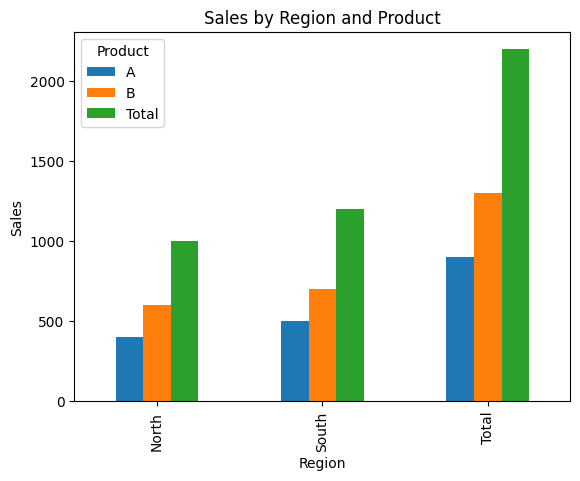

In [22]:
pivot_table_sales_margins.plot(kind="bar")
plt.title("Sales by Region and Product")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

## Example 2: Customer Purchase Behavior Analysis

In [23]:
data = {
    "CustomerID": [1, 2, 1, 3, 2, 3, 1, 2],
    "PurchaseDate": [
        "2023-01-01",
        "2023-01-01",
        "2023-01-02",
        "2023-01-02",
        "2023-01-03",
        "2023-01-03",
        "2023-01-04",
        "2023-01-04",
    ],
    "Category": [
        "Electronics",
        "Electronics",
        "Furniture",
        "Furniture",
        "Electronics",
        "Electronics",
        "Furniture",
        "Furniture",
    ],
    "Amount": [120, 150, 200, 250, 300, 350, 400, 450],
}

df = pd.DataFrame(data)
print(df)

   CustomerID PurchaseDate     Category  Amount
0           1   2023-01-01  Electronics     120
1           2   2023-01-01  Electronics     150
2           1   2023-01-02    Furniture     200
3           3   2023-01-02    Furniture     250
4           2   2023-01-03  Electronics     300
5           3   2023-01-03  Electronics     350
6           1   2023-01-04    Furniture     400
7           2   2023-01-04    Furniture     450


### Step 1: Summarize Total Amount Spent by Customer and Category

In [24]:
pivot_table_customer = pd.pivot_table(
    df,
    values="Amount",
    index="CustomerID",
    columns="Category",
    aggfunc="sum",
    fill_value=0,
)
print(pivot_table_customer)

Category    Electronics  Furniture
CustomerID                        
1                   120        600
2                   450        450
3                   350        250


### Step 2: Analyzing Purchase Patterns

In [25]:
pivot_table_customer_margins = pd.pivot_table(
    df,
    values="Amount",
    index="CustomerID",
    columns="Category",
    aggfunc="sum",
    fill_value=0,
    margins=True,
    margins_name="Total",
)
print(pivot_table_customer_margins)

Category    Electronics  Furniture  Total
CustomerID                               
1                   120        600    720
2                   450        450    900
3                   350        250    600
Total               920       1300   2220


### Step 3: Visualizing Customer Purchase Behavior

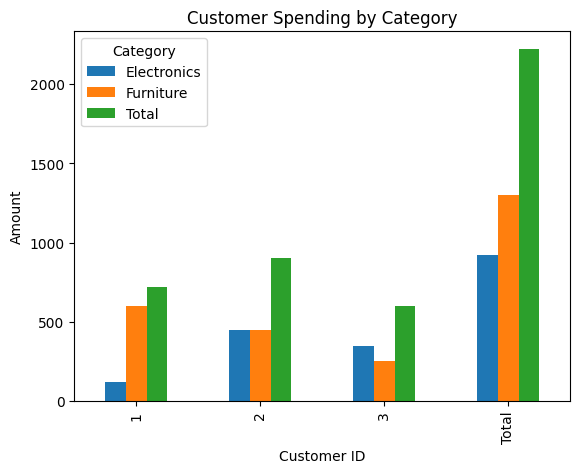

In [26]:
pivot_table_customer_margins.plot(kind="bar")
plt.title("Customer Spending by Category")
plt.xlabel("Customer ID")
plt.ylabel("Amount")
plt.show()